### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8788,No Urgent Place,Partner,Sunny,80,10PM,Restaurant(<20),1d,Male,26,Married partner,...,NaN,1~3,1~3,less1,1,1,0,0,1,1
11912,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,below21,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,1
9821,Home,Alone,Sunny,80,6PM,Restaurant(<20),1d,Female,21,Single,...,1~3,4~8,1~3,less1,1,0,0,1,0,0
11419,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,31,Married partner,...,1~3,gt8,4~8,1~3,1,0,0,0,1,1
10717,Home,Alone,Sunny,80,10PM,Restaurant(20-50),1d,Female,41,Single,...,less1,1~3,1~3,less1,1,1,0,0,1,1
3546,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Female,21,Single,...,4~8,4~8,4~8,1~3,1,0,0,0,1,1
11051,Home,Alone,Sunny,80,10PM,Restaurant(20-50),1d,Male,46,Single,...,1~3,4~8,4~8,4~8,1,0,0,0,1,1
10319,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Female,21,Married partner,...,1~3,1~3,1~3,1~3,1,1,0,0,1,1
10366,No Urgent Place,Partner,Sunny,55,2PM,Bar,1d,Female,26,Unmarried partner,...,less1,1~3,4~8,1~3,1,0,0,0,1,0
10925,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,less1,1,0,0,1,0,0


2. Investigate the dataset for missing or problematic data.

Text(0, 0.5, 'Missing Value Count')

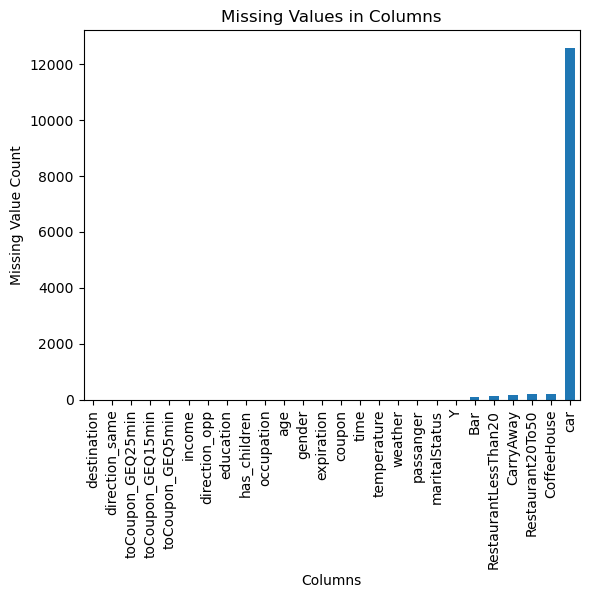

In [6]:
data.isnull().sum().sort_values().plot(kind = 'bar')
plt.title('Missing Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')

3. Decide what to do about your missing data -- drop, replace, other...

<Axes: >

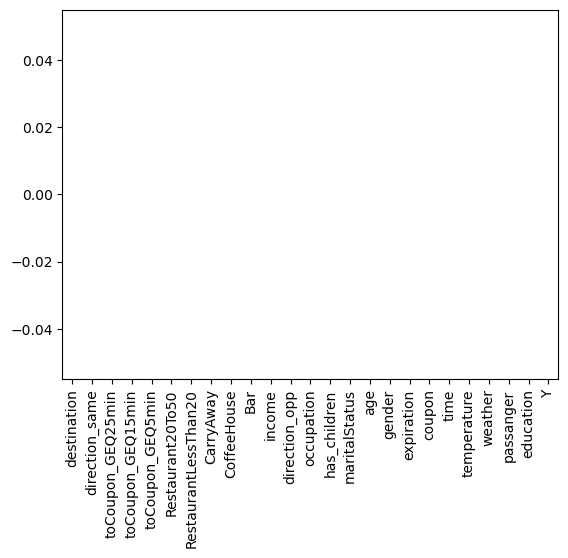

In [7]:
data['car'].unique()
# As the car is mostly none we can drop this from the data
clean_data = data.drop('car', axis = 1)
#for rest of the NaN values we can replace it with never
clean_data = clean_data.fillna('never')
clean_data.isnull().sum().sort_values().plot(kind = 'bar')

4. What proportion of the total observations chose to accept the coupon? 



In [9]:
coupon_count = clean_data['Y'].value_counts()
coupon_accepted = coupon_count[1]/ len(clean_data)
print(f"Proportion of coupon accepted: {coupon_accepted:.2%}")

Proportion of coupon accepted: 56.84%


5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Count')

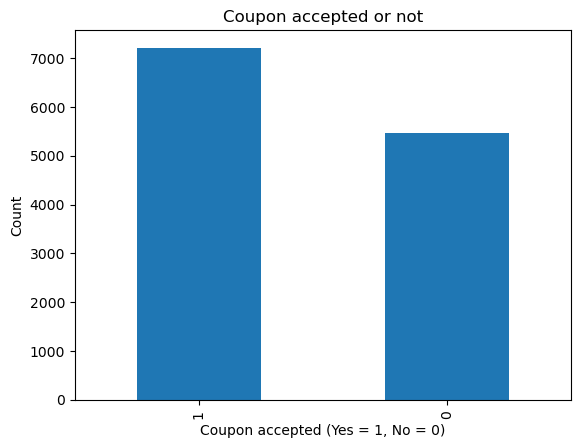

In [10]:
coupon_count.plot(kind='bar')
plt.title('Coupon accepted or not')
plt.xlabel('Coupon accepted (Yes = 1, No = 0)')
plt.ylabel('Count')

6. Use a histogram to visualize the temperature column.

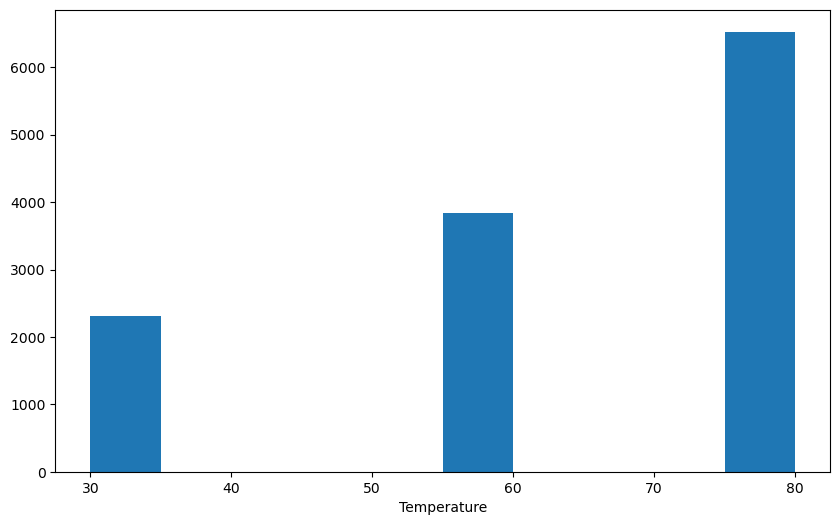

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(clean_data['temperature'])
plt.xlabel('Temperature')
plt.show()

In [49]:
clean_data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [78]:
bar_data['passanger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [99]:
bar_data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
bar_data = clean_data.query('coupon == "Bar"')
bar_count = len(bar_data)

2. What proportion of bar coupons were accepted?


In [13]:
coupon_bar = bar_data['Y'].value_counts()
bar_coupon_accepted = coupon_bar[1]/ bar_count
print(f"Proportion of coupon accepted: {bar_coupon_accepted:.2%}")

Proportion of coupon accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
less_than3 = bar_data[bar_data['Bar'].isin(['never', 'less1', '1~3'])]
more_than3 = bar_data[bar_data['Bar'].isin(['gt8', '4~8'])]
rate1 = less_than3['Y'].mean()
rate2 = more_than3['Y'].mean()
print(f"Acceptance rate of people who went to bar <=3 = {rate1:.2}")
print(f"Acceptance rate of people who went to bar >3 = {rate2:.2}")

Acceptance rate of people who went to bar <=3 = 0.37
Acceptance rate of people who went to bar >3 = 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
bar_data['age'] = bar_data['age'].replace({'below21': '20', '50plus': '50'})
bar_data['age'] = bar_data['age'].astype(int)
ans_4_1 = bar_data.query("(Bar in ['1~3','gt8', '4~8']) and age > 25")
ans_4_2 = bar_data.query("(Bar in ['never', 'less1']) or age <= 25")

ans_4_1_rate = ans_4_1['Y'].mean()
ans_4_2_rate = ans_4_2['Y'].mean()

print(f"Acceptance rate of people who visted bar more than once a month and are over the age of 25 = {ans_4_1_rate:.2}")
print(f"Acceptance rate of all others = {ans_4_2_rate:.2}")

Acceptance rate of people who visted bar more than once a month and are over the age of 25 = 0.7
Acceptance rate of all others = 0.34


/var/folders/7x/lwsbr1192w3dwmtwlxrykskh0000gp/T/ipykernel_30418/1713368974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['age'] = bar_data['age'].replace({'below21': '20', '50plus': '50'})
/var/folders/7x/lwsbr1192w3dwmtwlxrykskh0000gp/T/ipykernel_30418/1713368974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['age'] = bar_data['age'].astype(int)


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [16]:
#create 1st set
ans_5_1 = bar_data.query("(Bar in ['1~3','gt8', '4~8']) and passanger not in ['Kid(s)']")
ans_5_1 = bar_data.query("occupation not in ['Farming Fishing & Forestry']")

#create 2nd set
ans_5_2 = bar_data.query("(Bar in ['never', 'less1']) or passanger in ['Kid(s)'] or occupation in ['Farming Fishing & Forestry']")

ans_5_1_rate = ans_5_1['Y'].mean()
ans_5_2_rate = ans_5_2['Y'].mean()

print(f"Acceptance rate of who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry = {ans_5_1_rate:.3}")
print(f"Acceptance rate of all others = {ans_5_2_rate:.3}")

Acceptance rate of who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry = 0.41
Acceptance rate of all others = 0.296


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [18]:
ans_6_1 = bar_data.query("(Bar in ['1~3','gt8', '4~8']) and passanger not in ['Kid(s)'] and maritalStatus not in ['Widowed']")
ans_6_2 = bar_data.query("(Bar in ['1~3','gt8', '4~8']) and age < 30")
salary_filter = ['Less than $12500', '$12500 - $24999','$25000 - $37499', '$37500 - $49999']
ans_6_3 = bar_data.query("RestaurantLessThan20 in ['4~8', 'gt8'] and income in @salary_filter")

ans_6_1_rate = ans_6_1['Y'].mean()
ans_6_2_rate = ans_6_2['Y'].mean()
ans_6_3_rate = ans_6_3['Y'].mean()

print(f"Acceptance rate of Set 1 = {ans_6_1_rate:.2}")
print(f"Acceptance rate of Set 2 = {ans_6_2_rate:.2}")
print(f"Acceptance rate of Set 3 = {ans_6_3_rate:.2}")

Acceptance rate of Set 1 = 0.71
Acceptance rate of Set 2 = 0.72
Acceptance rate of Set 3 = 0.45


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the above observation we can make following hypothesis
1. Drivers who have vist bar more than 3 times a month tend to accept the coupon
2. Drivers when they have kids as passenger tend not to accept the coupon
3. Drivers who have visted bars more than once and are less than 30 years of age also accept coupon
4. Also people with higher salary accepts coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [33]:
#Analysis on the basis of destination
clean_data.groupby(['destination'])['Y'].mean().reset_index()

,destination,Y
0,Home,0.506333
1,No Urgent Place,0.633774
2,Work,0.502212


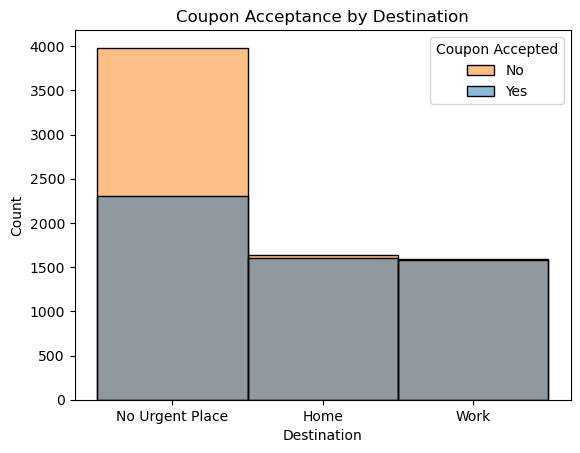

In [26]:
plot = sns.histplot(clean_data, x='destination', hue='Y')
plt.title('Coupon Acceptance by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')

plot.legend(title='Coupon Accepted', labels=['No', 'Yes'])

plt.show()

In [28]:
# Check if 
coupon_rate = clean_data.groupby(['destination', 'coupon'])['Y'].mean().reset_index()

# Rename the column to represent the rate
coupon_rate = coupon_rate.rename(columns={'Y': 'Coupon_Acceptance_Rate'})

print(coupon_rate)

        destination                 coupon  Coupon_Acceptance_Rate
0              Home                    Bar                0.456522
1              Home  Carry out & Take away                0.788668
2              Home           Coffee House                0.362069
3              Home      Restaurant(20-50)                0.430322
4              Home        Restaurant(<20)                0.555332
5   No Urgent Place                    Bar                0.408203
6   No Urgent Place  Carry out & Take away                0.762781
7   No Urgent Place           Coffee House                0.580974
8   No Urgent Place      Restaurant(20-50)                0.502439
9   No Urgent Place        Restaurant(<20)                0.792541
10             Work                    Bar                0.365503
11             Work  Carry out & Take away                0.654856
12             Work           Coffee House                0.445783
13             Work      Restaurant(20-50)                0.39

Text(50.72222222222221, 0.5, 'Destination')

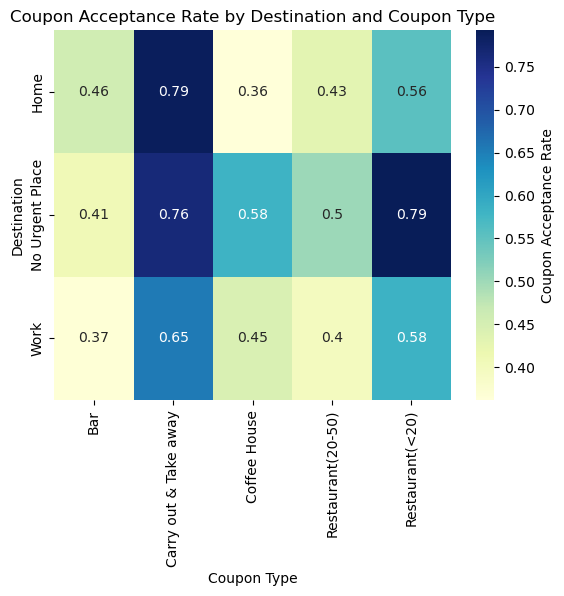

In [32]:
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Coupon Acceptance Rate'})
plt.title('Coupon Acceptance Rate by Destination and Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Destination')

Based on above analyis we can make following analysis
1. When just looking at the first plot, it seems only when the driver's destination is non urgent they tend to accept the coupon more, otherwise the acceptance rate is ~50%
2. But when we include the type of the coupon, we see that most accepted type of coupons are Carry out & Take away
3. When destination is home, acceptance rate of Carry out & Take away is highest
4. Also drivers with no urgent destination are most likely to accepts coupons of cheaper restaurant or take aways

In [58]:
#Analysis of Coffee House coupons
coffee_data = clean_data.query('coupon == "Coffee House"')

In [66]:
ans_coffee = coffee_data.query("(CoffeeHouse in ['gt8', '4~8'])")
ans_coffee_rate = ans_coffee['Y'].mean()
ans_coffee_rate

0.675

In [67]:
ans_coffee = coffee_data.query("(CoffeeHouse not in ['gt8', '4~8'])")
ans_coffee_rate = ans_coffee['Y'].mean()
ans_coffee_rate

0.44961489088575096

In [72]:
# mean on the basis of passanger
ans_7_1 = coffee_data.query("(CoffeeHouse in ['1~3','gt8', '4~8']) and passanger not in ['Kid(s)']")
ans_7_2 = coffee_data.query("(CoffeeHouse in ['1~3','gt8', '4~8']) and passanger in ['Kid(s)']")
ans_7_1_rate = ans_7_1['Y'].mean()
ans_7_2_rate = ans_7_2['Y'].mean()
print(f"Acceptance rate with kids = {ans_7_1_rate:.2}")
print(f"Acceptance rate without kids = {ans_7_2_rate:.2}")

Acceptance rate with kids = 0.66
Acceptance rate without kids = 0.65


In [73]:
ans_8_1 = coffee_data.query("(CoffeeHouse in ['1~3','gt8', '4~8']) and passanger in ['Friend(s)', 'Partner']")
ans_8_1_rate = ans_8_1['Y'].mean()
ans_8_2 = coffee_data.query("(CoffeeHouse in ['1~3','gt8', '4~8']) and passanger in ['Alone']")
ans_8_2_rate = ans_8_2['Y'].mean()

print(f"Acceptance rate with friends and partners = {ans_8_1_rate:.2}")
print(f"Acceptance rate when alone = {ans_8_2_rate:.2}")

Acceptance rate with friends and partners = 0.77
Acceptance rate when alone = 0.59


In [77]:
ans_9_1 = coffee_data.query("(CoffeeHouse in ['1~3','gt8', '4~8']) and income in @salary_filter")
ans_9_1_rate = ans_9_1['Y'].mean()
ans_9_2 = coffee_data.query("(CoffeeHouse in ['1~3','gt8', '4~8']) and income not in @salary_filter")
ans_9_2_rate = ans_9_2['Y'].mean()

print(f"Acceptance rate with low salary range = {ans_9_1_rate:.2}")
print(f"Acceptance rate with high salary range = {ans_9_2_rate:.2}")

Acceptance rate with low salary range = 0.7
Acceptance rate with high salary range = 0.62


In [79]:
ans_10_1 = coffee_data.query("(CoffeeHouse in ['1~3','gt8', '4~8']) and destination not in ['Work', 'Home']")
ans_10_1_rate = ans_10_1['Y'].mean()
ans_10_2 = coffee_data.query("(CoffeeHouse in ['1~3','gt8', '4~8']) and destination in ['Work', 'Home']")
ans_10_2_rate = ans_10_2['Y'].mean()

print(f"Acceptance rate when destination is not urgent = {ans_10_1_rate:.2}")
print(f"Acceptance rate when destination is home or work = {ans_10_2_rate:.2}")

Acceptance rate when destination is not urgent = 0.74
Acceptance rate when destination is home or work = 0.57


In [ ]:
ans_10_1 = coffee_data.query("(CoffeeHouse in ['1~3','gt8', '4~8']) and occupation in ['Work', 'Home']")
ans_10_1_rate = ans_10_1['Y'].mean()
ans_10_2 = coffee_data.query("(CoffeeHouse in ['1~3','gt8', '4~8']) and destination in ['Work', 'Home']")
ans_10_2_rate = ans_10_2['Y'].mean()

print(f"Acceptance rate when destination is not urgent = {ans_10_1_rate:.2}")
print(f"Acceptance rate when destination is home or work = {ans_10_2_rate:.2}")

Based on above observations we can say
1. Drivers who go to Coffee House nore that 3 times a month accepts coupon more
2. Drivers with kids as passanger, and who have visited coffee place, have almost same rate of acceptance of the coupon
3. When Driver are accomapnied with partner or friends they acceptance rate of coupon is more
4. Drivers who don't have any urgent destination tend to accept coffee coupons more